This project aims to investigate whether age and recorded playing time of a player are accurate predictors of whether a player is subscribed to the Minecraft newsletter. 

In [1]:
#needed R packages for this project:
library(tidyverse) 
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("data/players.csv") #loading the dataset used for the investigation
slice(players_data, 1:8) #for preview

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21


In [3]:
summary(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

(1) Data Description:

This project will be using the "player.csv" dataset that contains information about players who participated in a video game research and their activity in a designated MineCraft server. The dataset contains 196 observations of players and 7 variables. The following 7 variables of players are recorded.

- experience (categorical): A rating of how experienced the player is at Minecraft based on four descriptors (Amateur, Regular, Veteran, Pro), stored as character data type. 
- subscribe (logical values) - Whether a player subscribed to the Minecraft newsletter, stored as logical values data type.
- hashedEmail (identifier) - Emails of players transformed into a string as character data. 
- played_hours (quantitative)- Time spent on the MineCraft server in hours, this is the only player behaviour data recorded as decimals as double data type.
- name (identifier) - Name of players as character data type.
- gender (categorical) - Gender of players as male or female, stored as character data type.
- Age (quantitative)- Age of players as integers stored as double data type. 

The dataset is tidy because each row only has a single player's observation, each column is only one variable about players, and there is only one number/descriptor/logical value in all cells. An observable problem is that there are missing values in the dataset as shown by the 'summary()' function. A potential problem that is not observable with this dataset is that whether the order of observations were completely random is not known and the 'sample()' function may need to be used before splitting the dataset into training and testing datasets. 

(2) Questions:

Chosen Broad Question: Question 1: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

Formulated Specific Question: "Can age and playing time of players accurately predict whether a player is subscribed to the Minecraft newsletter?"

The data in the dataset "player.csv" contains “played_hours” and “age” of players as quantitative explanatory variables, and “subscribe” as the categorical response variable, which are all variables of interest to predict whether a player is subscribed to the Minecraft newsletter. A classification model used for the prediction will be trained and tested using these three variables. To prepare the dataset for this classification, the column with these three variables will be retained using the 'select()' function, and the dataframe with these variables will later be split into training and testing datasets. Since the subscribe column are stored as logical values it is best to convert them to factor using 'as.factor' for them to be considered as categorical.

In [4]:
#wrangling for classification
players_select <- players_data |> select(subscribe, played_hours, Age) #retaining variables of interest for clasification
players_select <- mutate(players_select, subscribe = as.factor(subscribe)) #converting logical values to factor data type
slice(players_select, 1:8) #for preview

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21


In [5]:
#computing mean for quantitative variables(played_hours and Age)
summarize(players_data, played_hours_mean = mean(played_hours), Age_mean = mean(Age, na.rm = TRUE))

played_hours_mean,Age_mean
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


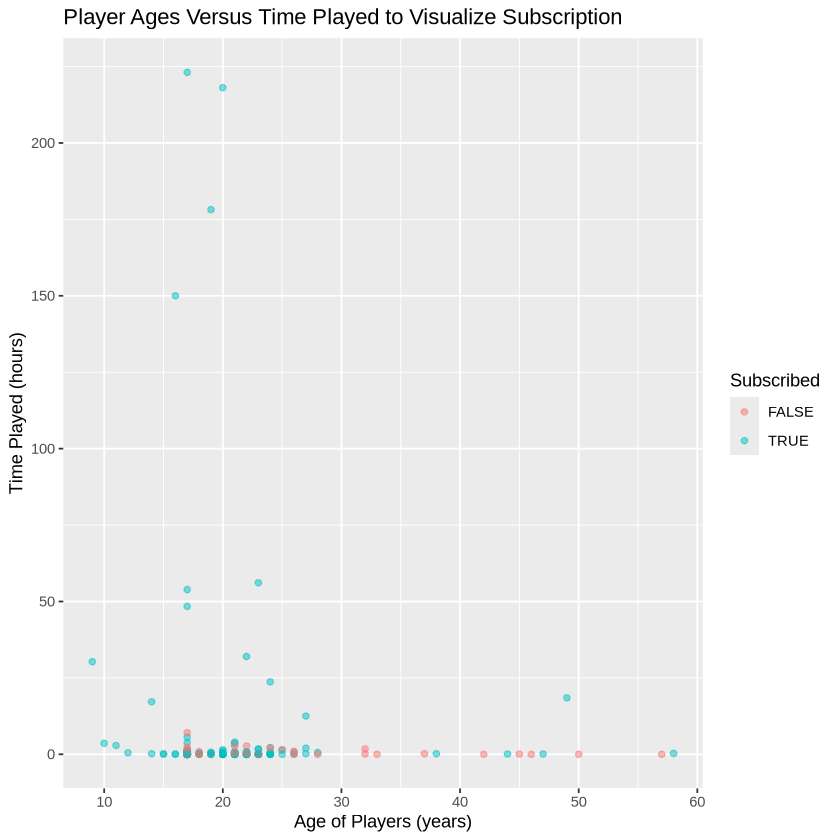

In [8]:
#exploratory visualization for classification 
players_select |> ggplot(
    aes(x = Age, 
        y = played_hours, 
        colour = subscribe)) + 
    labs(x = "Age of Players (years)", y = "Time Played (hours)", colour = "Subscribed") + 
    geom_point(alpha =0.5) +
    ggtitle("Player Ages Versus Time Played to Visualize Subscription")

Visualization demonstrates that younger players with higher playing times are more predominantly subscribed.